# day 143

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# playing with circles!

In [ ]:
# importing the circle's data from sklearn

from sklearn.datasets import make_circles

x,y = make_circles(n_samples=1000,noise=0.06,random_state=42,factor=0.6)

# train_test_splitting
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)





In [ ]:
# exploring the data

x_train

array([[ 0.52960408, -0.31230232],
       [ 0.58856513, -0.73181349],
       [-1.02858087, -0.09783542],
       ...,
       [-0.00620062, -1.0606812 ],
       [ 1.03339982,  0.18583134],
       [ 0.42191123, -0.42144321]])

In [ ]:
x_train.shape,y_train.shape

((800, 2), (800,))

In [ ]:
np.max(x_train), np.min(x_train)

(1.0867048051622454, -1.1444780470331497)

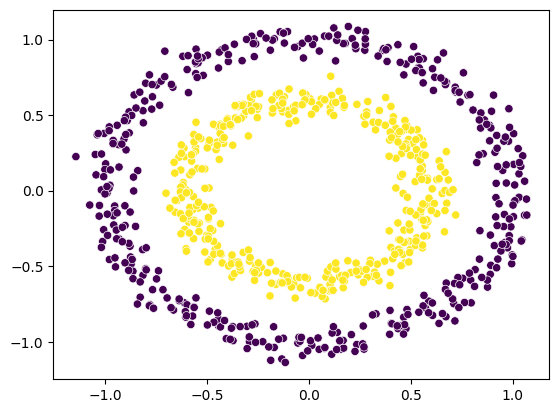

In [ ]:
# plotting the training data
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],c=y_train)


plt.show()

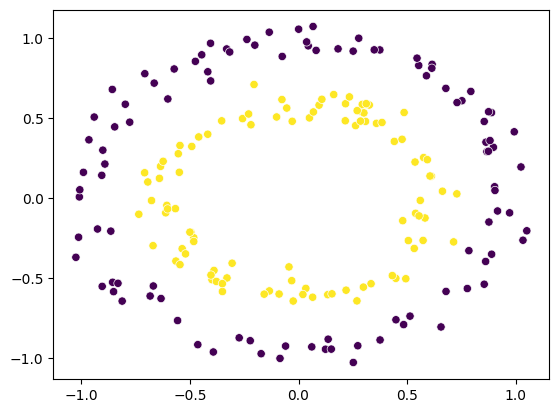

In [ ]:
# plotting the testing data

sns.scatterplot(x=x_test[:,0],y=x_test[:,1],c=y_test)

plt.show()

# building our first model for classifying the circles


# bare necessary for a binary classification:

1. output_layer activation function is sigmoid
2. use binary cross entropy for loss function


In [ ]:
# setting the random seed
tf.random.set_seed(42)

# building the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer1'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer2'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer3'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer4'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer5'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])


# fit the model
history = model.fit(x_train,y_train,epochs=60,verbose=False)

# evaluating the model
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 2.7805e-04 - accuracy: 1.0000


[0.0002780473732855171, 1.0]

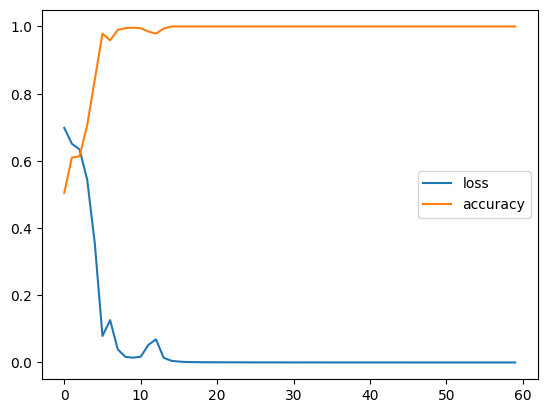

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

# exploration,analysis and freethrows:



In [ ]:
a = np.array([1,2,3,4,5])
b = np.array([2,4,6,8,10])

dick = np.c_[a,b] # note we use square bracket not parenthesis. that got me bolted the first time used it.
dick

array([[ 1,  2],
       [ 2,  4],
       [ 3,  6],
       [ 4,  8],
       [ 5, 10]])

In [ ]:
thick = np.r_[a,b]
thick

array([ 1,  2,  3,  4,  5,  2,  4,  6,  8, 10])

# showing the plot of the model

In [ ]:
def plot_model(model,x,y):


  # setting the axis boundary for the meshgrid
  x0_min, x0_max  = x[:,0].min()-0.01, x[:,0].max()+0.01
  x1_min, x1_max =  x[:,1].min()-0.01, x[:,1].max()+0.01

  # creating the meshgrid
  xx,yy = np.meshgrid(np.linspace(x0_min,x0_max,100),np.linspace(x1_min,x1_max,100))

  # flatten it
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # prediction
  prediction = model.predict(x_in)


  # reshaping the prediciton based off requirment
  if len(prediction[0]) > 1:

      print('We are doing multi-class classification')

      prediction = np.argmax(prediction,axis=1).reshape(xx.shape)

  else:

      print('We are doing Binary classification')

      prediction = np.round(prediction).reshape(xx.shape)



  # plot the decision boundary:

  plt.contourf(xx,yy,prediction,alpha=0.7)
  plt.scatter(x=x[:,0],y=x[:,1],c=y)

  plt.xlim(x0_min,x0_max)
  plt.ylim(x1_min,x1_max)

  plt.show()

313/313 [==============================] - 1s 2ms/step
We are doing Binary classification


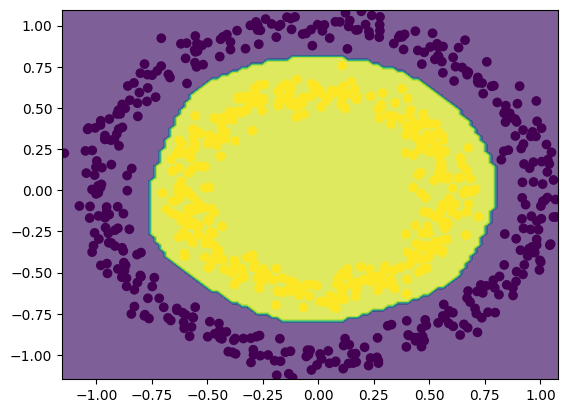

In [ ]:
plot_model(model,x_train,y_train)

# day 143

# playing with make moons dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# importing the data from sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x,y = make_moons(n_samples=1000,noise=0.1,random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)




In [ ]:
x_train.shape,y_train.shape

((800, 2), (800,))

# visualizing the moons:

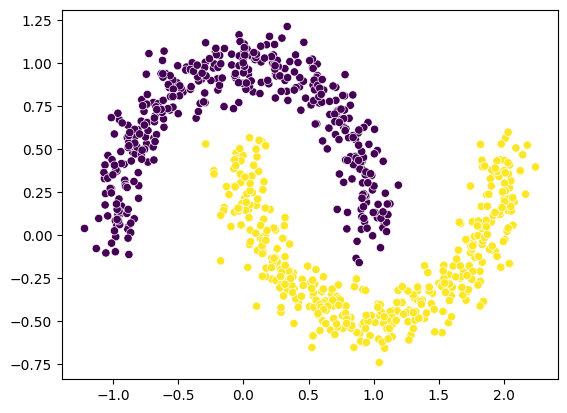

In [ ]:
# visualizing the training data

sns.scatterplot(x=x_train[:,0],y=x_train[:,1],c=y_train)

plt.show()



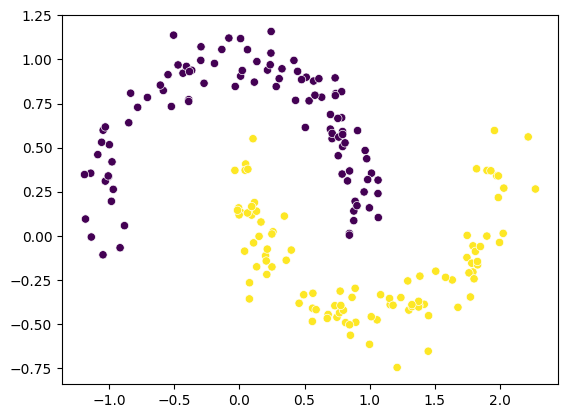

In [ ]:
# visualizing the testing data

sns.scatterplot(x=x_test[:,0],y=x_test[:,1],c=y_test);

# building the neural network for classifying the moons

In [ ]:
# setting the random_seed
tf.random.set_seed(42)


# building the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer1'))
model1.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer2'))
model1.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer3'))
model1.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer4'))
model1.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer5'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compiling the model:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
               metrics=['accuracy'])

# fitting the model
history1 = model1.fit(x_train,y_train,epochs=100,verbose=False)

# evaluating the model
model1.evaluate(x_test,y_test)




7/7 [==============================] - 1s 5ms/step - loss: 2.1882e-05 - accuracy: 1.0000


[2.1882224245928228e-05, 1.0]

# plotting the moon model's plot

In [ ]:
def plot_model(model,x,y):


  # setting the axis boundary for the meshgrid
  x0_min, x0_max  = x[:,0].min()-0.01, x[:,0].max()+0.01
  x1_min, x1_max =  x[:,1].min()-0.01, x[:,1].max()+0.01

  # creating the meshgrid
  xx,yy = np.meshgrid(np.linspace(x0_min,x0_max,100),np.linspace(x1_min,x1_max,100))

  # flatten it
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # prediction
  prediction = model.predict(x_in)


  # reshaping the prediciton based off requirment
  if len(prediction[0]) > 1:

      print('We are doing multi-class classification')

      prediction = np.argmax(prediction,axis=1).reshape(xx.shape)

  else:

      print('We are doing Binary classification')

      prediction = np.round(prediction).reshape(xx.shape)



  # plot the decision boundary:

  plt.contourf(xx,yy,prediction,alpha=0.7)
  plt.scatter(x=x[:,0],y=x[:,1],c=y)

  plt.xlim(x0_min,x0_max)
  plt.ylim(x1_min,x1_max)

  plt.show()

313/313 [==============================] - 1s 2ms/step
We are doing Binary classification


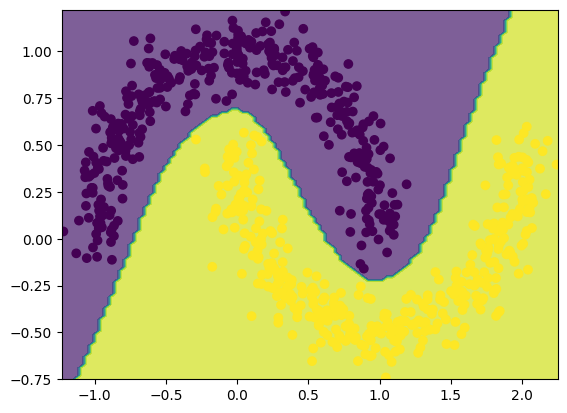

In [ ]:
plot_model(model1,x_train,y_train)

# conclusion:
# it seems quite crude but predicts well. this is why we need visual computing. we have to make the computer see
# the world.

In [ ]:
# creating a confusion matrix and classification report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

actual = y_test
prediction = model1.predict(x_test)


confusion_matrix(actual,prediction)





7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
actual[:10],prediction[:10]

# prediction and actual have to be 1's and 0's to create the confusion matrix.
# to convert the prediction from having probability density values to concrete 1's and 0's we have to round it!

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]),
 array([[9.9998111e-01],
        [2.4137415e-05],
        [9.9998033e-01],
        [2.4125242e-05],
        [9.9998069e-01],
        [9.9998081e-01],
        [2.4502295e-05],
        [2.5182782e-05],
        [9.9998111e-01],
        [2.4123170e-05]], dtype=float32))

In [ ]:
actual = y_test
prediction = np.round(model1.predict(x_test))

cm = confusion_matrix(actual,prediction)
cm

7/7 [==============================] - 0s 3ms/step


array([[100,   0],
       [  0, 100]])

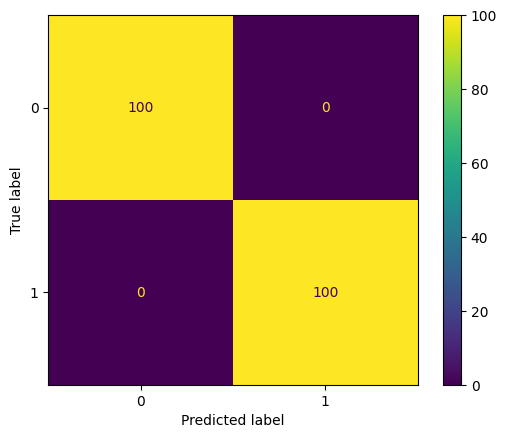

In [ ]:
# creating the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


plt.show()

In [ ]:
# printing the classification_report

print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# working with fashion_mnist data

a multiclass classification data

# day 143 and day 144

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
# extracting the data from the source.
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# exploring the data

x_train.shape, y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# normalizing the data

x_train = x_train/np.max(x_train)
x_test  = x_test/np.max(x_test)

In [ ]:
x_train[33]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.03137255, 0.88235294, 0.76862745, 0.78431373,
        0.94901961, 0.51764706, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08235294, 0.87843137, 0.8       , 0.81176471,
        0.63921569, 0.45098039, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05490196, 0.12156863,
        0.15686275, 0.        , 0.5254902 , 0.99607843, 0.98039216,
        0.84705882, 0.0901

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# setting the class_names for y_train and y_test
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# visualizing the fashion_mnist

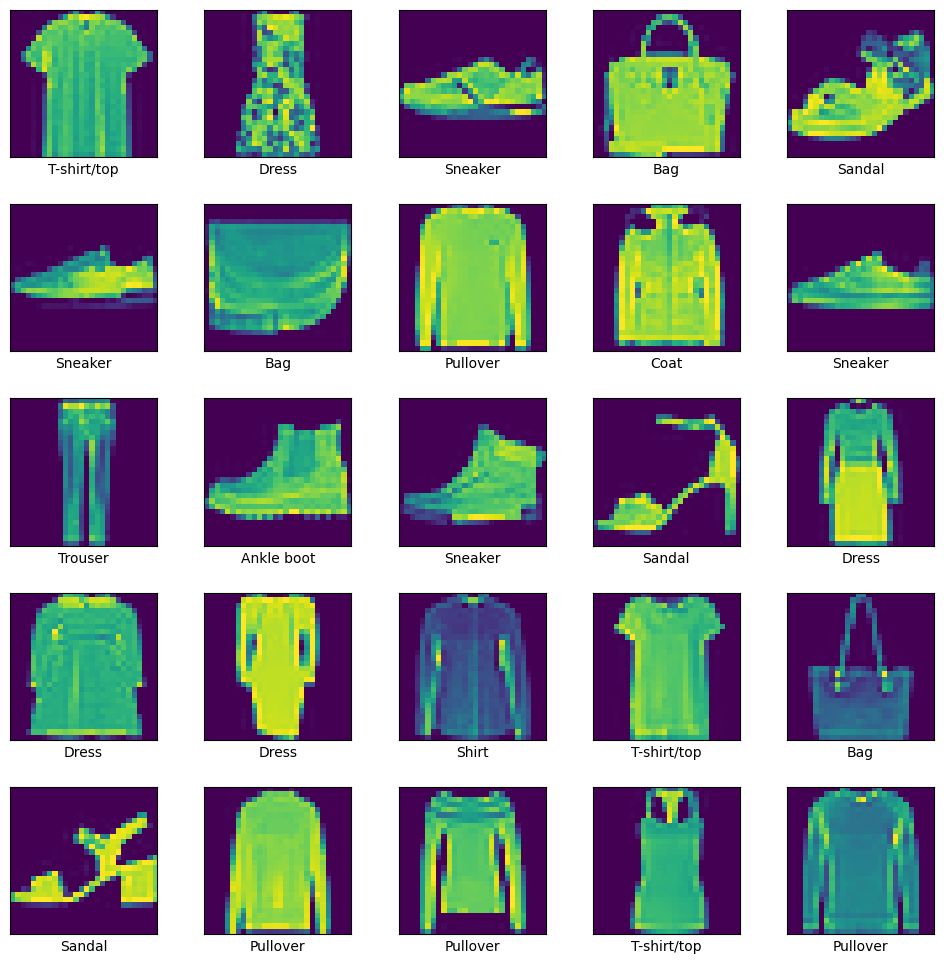

In [ ]:
plt.figure(figsize=(10,10))
number_of_images = 25
for i in range(number_of_images):
  dimension = int(np.sqrt(number_of_images))

  ax = plt.subplot(dimension,dimension,i+1)

  random_index = np.random.choice(len(x_train))

  ax.imshow(x_train[random_index])

  ax.set_xlabel(class_names[y_train[random_index]])


  # turning the x_ticks and y_ticks off
  ax.set_xticks([])
  ax.set_yticks([])


plt.tight_layout(pad=(2))
plt.show()

# building the model

# things to keep in mind when doing multiclass classification:

1. reshape and flatten whenever required.

2. use softmax for output_layer activation

3. use SparseCategoricalCrossentropy for losses if the labels are integers and CategoricalCrossentropy for losses if the labels are one_hot_encoded.

3. flatten the input and determine input_shape = x_train[0].shape

4. determine the class shape in output_layer: len(output_layer).

In [ ]:
# setting random-seed
tf.random.set_seed(42)

# building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer1'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer2'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer3'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer4'))
model.add(tf.keras.layers.Dense(6,activation='tanh',name='hidden_layer5'))
model.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fitting the model
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))



Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0353 - accuracy: 0.6690 - val_loss: 0.7344 - val_accuracy: 0.7456
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6591 - accuracy: 0.7632 - val_loss: 0.6545 - val_accuracy: 0.7569
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5943 - accuracy: 0.7901 - val_loss: 0.6294 - val_accuracy: 0.7712
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5559 - accuracy: 0.8117 - val_loss: 0.5703 - val_accuracy: 0.8110
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5258 - accuracy: 0.8236 - val_loss: 0.5549 - val_accuracy: 0.8191
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8310 - val_loss: 0.5430 - val_accuracy: 0.8148
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4873 - accuracy: 0.8360 - val_loss: 0.5476 - val_accuracy:

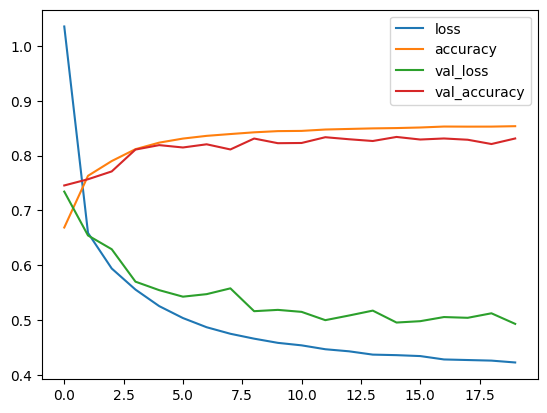

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

# trying to improve the model

In [ ]:
# setting random-seed
tf.random.set_seed(42)

# building the model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model1.add(tf.keras.layers.Dense(10,activation='tanh',name='hidden_layer1'))
model1.add(tf.keras.layers.Dense(10,activation='tanh',name='hidden_layer2'))
model1.add(tf.keras.layers.Dense(10,activation='tanh',name='hidden_layer3'))
model1.add(tf.keras.layers.Dense(10,activation='tanh',name='hidden_layer4'))
model1.add(tf.keras.layers.Dense(10,activation='tanh',name='hidden_layer5'))
model1.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fitting the model
history1 = model1.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))



Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.7845 - accuracy: 0.7559 - val_loss: 0.5408 - val_accuracy: 0.8200
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4887 - accuracy: 0.8354 - val_loss: 0.4985 - val_accuracy: 0.8265
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4456 - accuracy: 0.8465 - val_loss: 0.5032 - val_accuracy: 0.8216
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4250 - accuracy: 0.8548 - val_loss: 0.4671 - val_accuracy: 0.8415
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4114 - accuracy: 0.8580 - val_loss: 0.4544 - val_accuracy: 0.8451
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3992 - accuracy: 0.8616 - val_loss: 0.4774 - val_accuracy: 0.8350
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3897 - accuracy: 0.8647 - val_loss: 0.4908 - val_accuracy:

In [ ]:
# evaluating the model1

model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.8529


[0.43140360713005066, 0.8529000282287598]

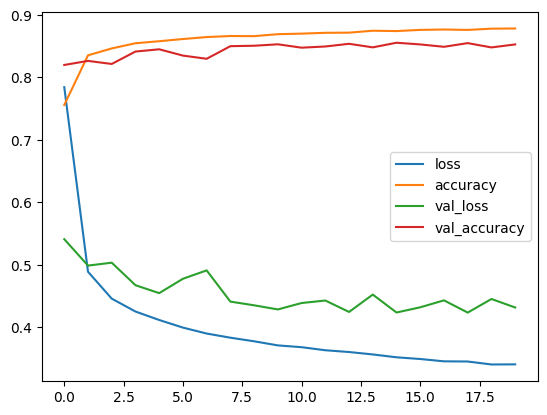

In [ ]:
pd.DataFrame(history1.history).plot()

plt.show()

# building model 2 with 20 neurons in each hidden-layer

In [ ]:
# setting random-seed
tf.random.set_seed(42)

# building the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model2.add(tf.keras.layers.Dense(20,activation='tanh',name='hidden_layer1'))
model2.add(tf.keras.layers.Dense(20,activation='tanh',name='hidden_layer2'))
model2.add(tf.keras.layers.Dense(20,activation='tanh',name='hidden_layer3'))
model2.add(tf.keras.layers.Dense(20,activation='tanh',name='hidden_layer4'))
model2.add(tf.keras.layers.Dense(20,activation='tanh',name='hidden_layer5'))
model2.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fitting the model
history2 = model2.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))



Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5993 - accuracy: 0.7972 - val_loss: 0.4887 - val_accuracy: 0.8326
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4150 - accuracy: 0.8548 - val_loss: 0.4832 - val_accuracy: 0.8348
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3827 - accuracy: 0.8652 - val_loss: 0.4172 - val_accuracy: 0.8560
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3613 - accuracy: 0.8729 - val_loss: 0.4058 - val_accuracy: 0.8580
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3496 - accuracy: 0.8762 - val_loss: 0.4001 - val_accuracy: 0.8576
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3423 - accuracy: 0.8786 - val_loss: 0.4389 - val_accuracy: 0.8441
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3336 - accuracy: 0.8819 - val_loss: 0.3969 - val_accura

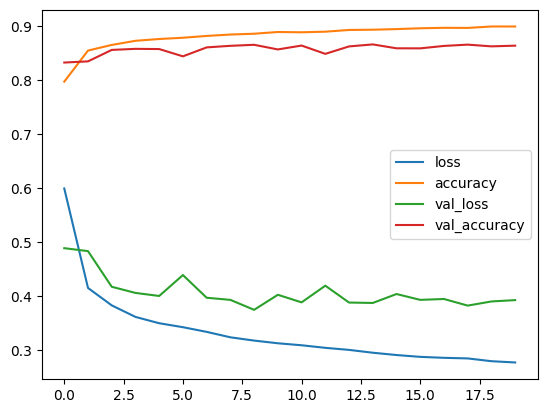

In [ ]:
pd.DataFrame(history2.history).plot()


plt.show()

# building the model3 with 50 neurons per hidden layer

In [ ]:
# setting random-seed
tf.random.set_seed(42)

# building the model
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model3.add(tf.keras.layers.Dense(50,activation='tanh',name='hidden_layer1'))
model3.add(tf.keras.layers.Dense(50,activation='tanh',name='hidden_layer2'))
model3.add(tf.keras.layers.Dense(50,activation='tanh',name='hidden_layer3'))
model3.add(tf.keras.layers.Dense(50,activation='tanh',name='hidden_layer4'))
model3.add(tf.keras.layers.Dense(50,activation='tanh',name='hidden_layer5'))
model3.add(tf.keras.layers.Dense(len(class_names),activation='softmax',name='output_layer'))


# compiling the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fitting the model
history3 = model3.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))



Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5062 - accuracy: 0.8193 - val_loss: 0.4276 - val_accuracy: 0.8434
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3789 - accuracy: 0.8614 - val_loss: 0.4508 - val_accuracy: 0.8446
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3493 - accuracy: 0.8731 - val_loss: 0.4150 - val_accuracy: 0.8461
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3267 - accuracy: 0.8818 - val_loss: 0.3740 - val_accuracy: 0.8638
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3164 - accuracy: 0.8829 - val_loss: 0.3633 - val_accuracy: 0.8693
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.8884 - val_loss: 0.4123 - val_accuracy: 0.8442
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.8932 - val_loss: 0.3711 - val_accuracy:

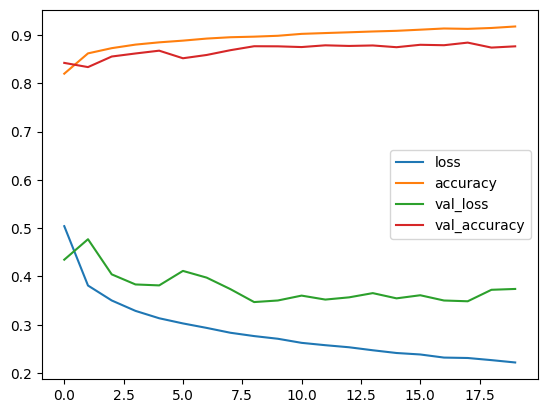

In [ ]:
pd.DataFrame(history3.history).plot()

plt.show()

# seeing the histories of models

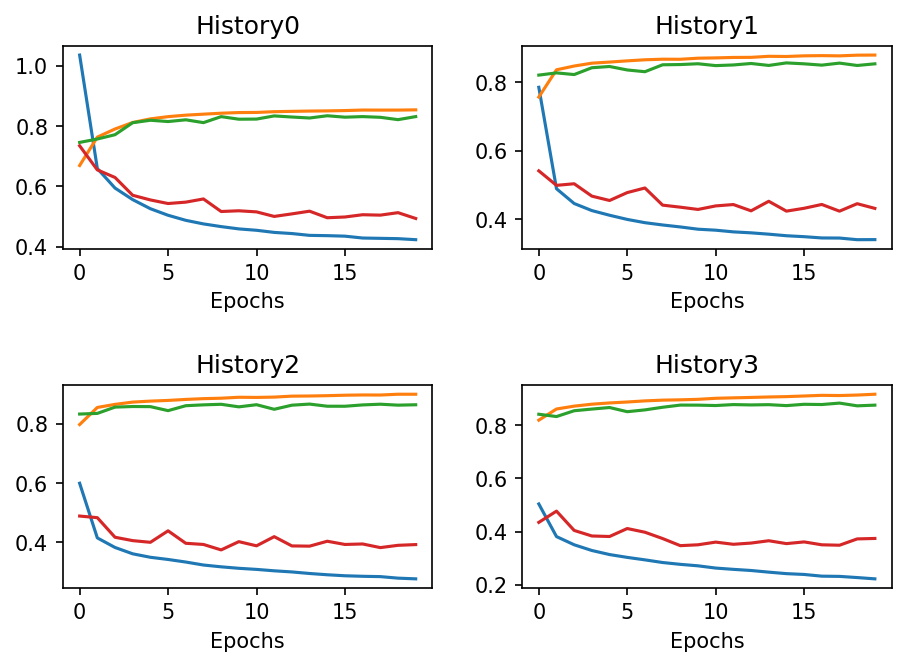

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,dpi=150)

epochs = np.arange(20)

ax[0][0].plot(epochs,history.history['loss'],label='Training Loss')
ax[0][0].plot(epochs,history.history['accuracy'],label='Training Accuracy')
ax[0][0].plot(epochs,history.history['val_accuracy'],label='Validation Accuracy')
ax[0][0].plot(epochs,history.history['val_loss'],label='Validation Loss')
ax[0][0].set_xlabel('Epochs')
ax[0][0].set_title('History0')

ax[0][1].plot(epochs,history1.history['loss'],label='Training Loss')
ax[0][1].plot(epochs,history1.history['accuracy'],label='Training Accuracy')
ax[0][1].plot(epochs,history1.history['val_accuracy'],label='Validation Accuracy')
ax[0][1].plot(epochs,history1.history['val_loss'],label='Validation Loss')
ax[0][1].set_xlabel('Epochs')
ax[0][1].set_title('History1')

ax[1][0].plot(epochs,history2.history['loss'],label='Training Loss')
ax[1][0].plot(epochs,history2.history['accuracy'],label='Training Accuracy')
ax[1][0].plot(epochs,history2.history['val_accuracy'],label='Validation Accuracy')
ax[1][0].plot(epochs,history2.history['val_loss'],label='Validation Loss')
ax[1][0].set_xlabel('Epochs')
ax[1][0].set_title('History2')

ax[1][1].plot(epochs,history3.history['loss'],label='Training Loss')
ax[1][1].plot(epochs,history3.history['accuracy'],label='Training Accuracy')
ax[1][1].plot(epochs,history3.history['val_accuracy'],label='Validation Accuracy')
ax[1][1].plot(epochs,history3.history['val_loss'],label='Validation Loss')
ax[1][1].set_xlabel('Epochs')
ax[1][1].set_title('History3')



plt.tight_layout(pad=2)

plt.show()

# creating the confusion matrix

313/313 [==============================] - 1s 4ms/step


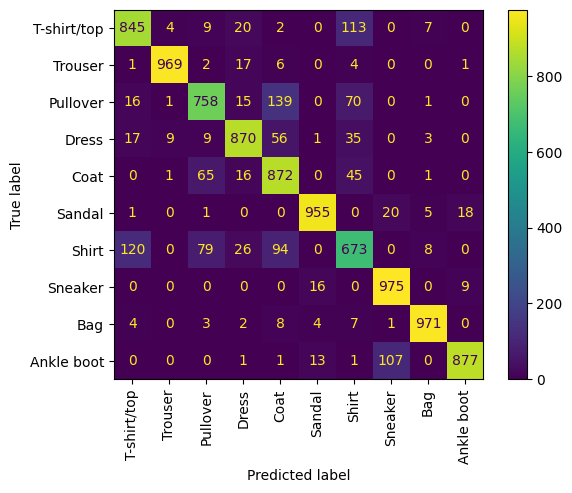

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


actual = y_test
predicted = model3.predict(x_test)
predicted_labels = np.argmax(predicted,axis=1)

cm = confusion_matrix(actual,predicted_labels)

# plotting the confusion matrix

disp = ConfusionMatrixDisplay(cm,display_labels=class_names)

disp.plot()
plt.xticks(rotation=90)

plt.show()

# classification report

In [ ]:
print(classification_report(actual,predicted_labels))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.76      0.79      1000
           3       0.90      0.87      0.88      1000
           4       0.74      0.87      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.71      0.67      0.69      1000
           7       0.88      0.97      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.88      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# experiment,analysis and freethrows

In [ ]:
# know why we found the argmax in axis=1 why not axis=0

predicted

array([[1.25601161e-06, 1.81547921e-06, 1.22284582e-05, ...,
        1.24097038e-02, 6.52168228e-06, 9.87070441e-01],
       [1.17799407e-03, 3.42928752e-06, 9.83999431e-01, ...,
        1.28614056e-05, 2.21280152e-06, 8.39585573e-06],
       [5.08032690e-06, 9.99964774e-01, 8.74602620e-07, ...,
        4.57449659e-07, 1.25493409e-06, 5.28033119e-08],
       ...,
       [7.88207471e-05, 1.12134764e-07, 1.16828569e-05, ...,
        9.24935478e-07, 9.99746799e-01, 4.64883487e-06],
       [3.33927619e-06, 9.99882638e-01, 1.28674901e-06, ...,
        4.35630021e-08, 2.53325038e-06, 5.41783329e-08],
       [1.10097730e-07, 1.33677195e-05, 1.80025364e-08, ...,
        3.20398285e-05, 2.77750723e-06, 3.10342443e-06]], dtype=float32)

In [ ]:
predicted.shape

# so there are 10000 rows and '10 columns'
# each column represents an item from the class_names
# so by finding the argmax in each column we can represent the corresponding item from the class_names that maxed it.


(10000, 10)

In [ ]:
np.argmax(predicted,axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
len(np.argmax(predicted,axis=1))

10000

In [ ]:
len(actual)

10000

# day 144 and day 145

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# creating a self-made softmax function and applying a tensor to it.

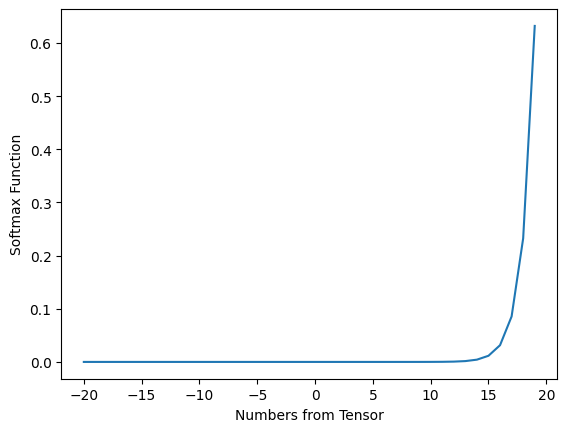

In [ ]:
def softmax(x):

  return np.exp(x - np.max(x))/sum(np.exp(x - np.max(x)))


tensor = tf.convert_to_tensor(np.arange(-20,20,1))

# plotting
plt.plot(tensor,softmax(tensor))

plt.xlabel('Numbers from Tensor')
plt.ylabel('Softmax Function')

plt.show()

# Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time

In [ ]:
# getting the actual and prediction (y and ybar)

actual = y_test
predicted = model3.predict(x_test)
predicted_labels = np.argmax(predicted,axis=1)
probability = np.round(np.max(predicted,axis=1)*100)



313/313 [==============================] - 1s 2ms/step


In [ ]:
len(predicted_labels),len(actual)

(10000, 10000)

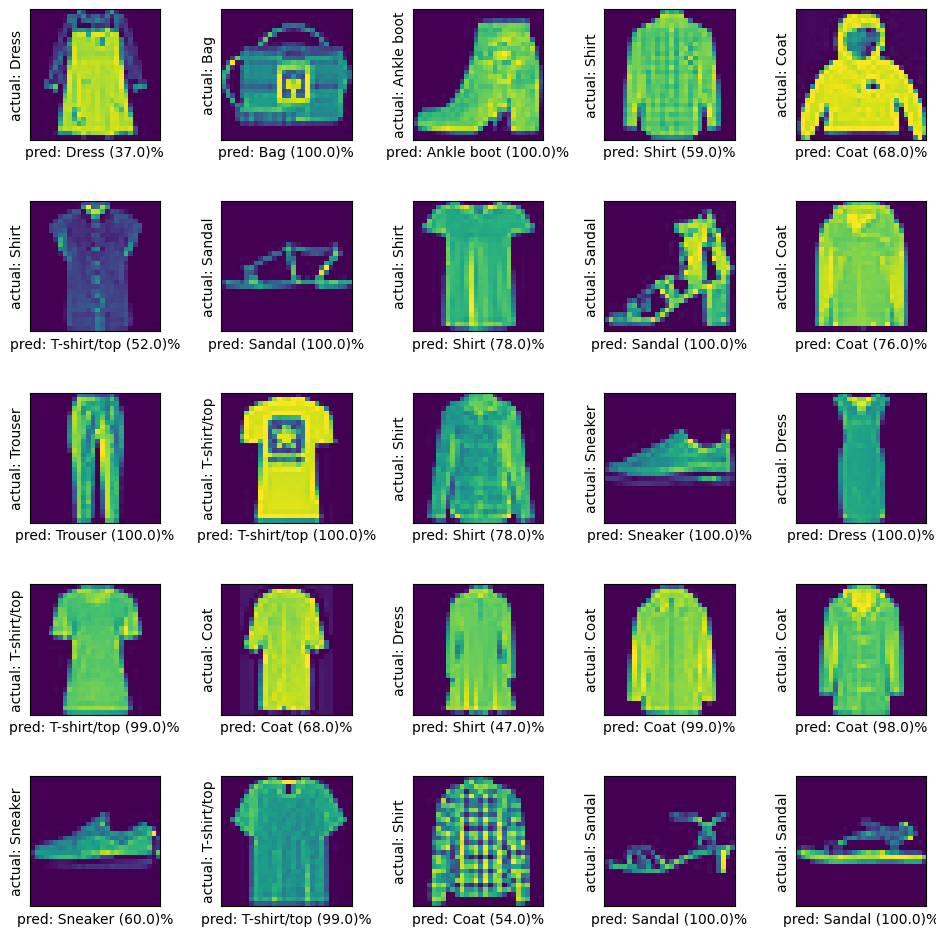

In [ ]:
# randomly plotting

actual = y_test

plt.figure(figsize=(10,10))

n = 25
dimension = int(np.sqrt(n))

for i in range(n):

  ax = plt.subplot(dimension,dimension,i+1)



  random_index = np.random.choice(len(predicted_labels))

  ax.imshow(x_test[random_index])

  ax.set_xlabel('pred: %s (%s)%%'%(class_names[predicted_labels[random_index]],probability[random_index]))
  ax.set_ylabel('actual: %s'%class_names[actual[random_index]])


  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout(pad=3)

plt.savefig('Apparels classification model.pdf')
plt.show()

In [ ]:
class_names[actual[random_index]]

'Sandal'

In [ ]:
probability

array([ 96., 100., 100., ..., 100., 100., 100.], dtype=float32)

In [ ]:
int(np.sqrt(20))

4

# Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 4 images of the T-shirt class with their predictions.

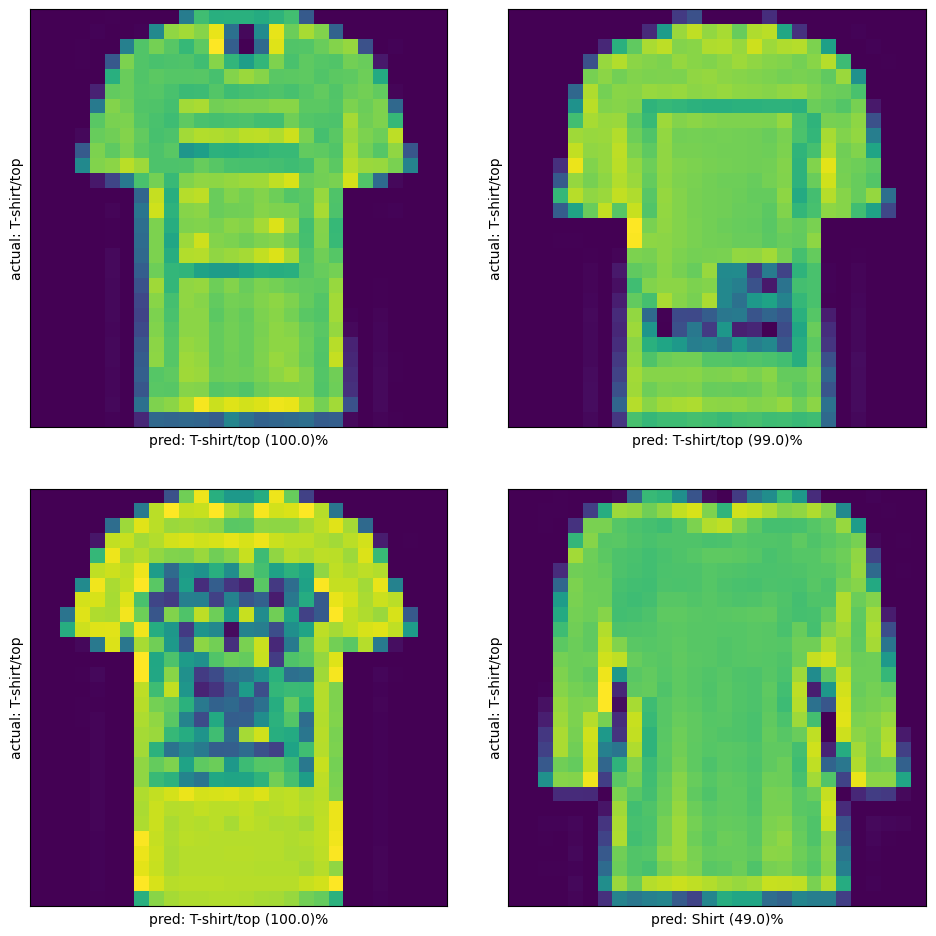

In [ ]:
# determing the # of pictures of we want to show and their dimension:
n = 4
dimension = int(np.sqrt(n))

# label number for tshirt
tshirt_label = 0

# we get the indices for t-shirt
boolean_for_tshirt = (y_test==tshirt_label)

indices_for_tshirt = []

for i in range(len(boolean_for_tshirt)):

  if boolean_for_tshirt[i] == True:
    indices_for_tshirt.append(i)

# choose randomly some indices from the indices_for_tshirt and display their prediction and actual

plt.figure(figsize=(10,10))

for i in range(n):

  ax = plt.subplot(dimension,dimension,i+1)

  random_choice = np.random.choice(indices_for_tshirt)

  ax.imshow(x_test[random_choice])

  ax.set_xlabel('pred: %s (%s)%%'%(class_names[predicted_labels[random_choice]],
                                   probability[random_choice]))
  ax.set_ylabel('actual: %s'%class_names[actual[random_choice]])


  ax.set_xticks([])
  ax.set_yticks([])


plt.tight_layout(pad=3)


plt.show()


# prediction = model3.predict(x_test)
# prediction_labels_for_tshirt = (np.argmax(prediction,axis=1)==tshirt_label)




# exploration,analysis and freethrows

In [ ]:
sum(predicted_labels == 0)

958

In [ ]:
actual_for_tshirt

array([False, False, False, ..., False, False, False])

In [ ]:
np.random.choice(indices_for_tshirt)

3668

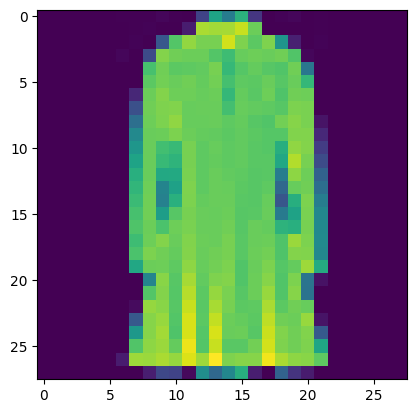

In [ ]:
plt.imshow(x_test[29])

In [ ]:
int(np.sqrt(3))

1

# day 145

# what i learned from 3 blue 1 brown channel's neural network video about Stochastic Gradient Descent:

1. signs of being negative means going down and positive means going up.

2. value or the amplitude of the weight determines how much to go down and up.

3. even though the networks can find pattern and predict possible outcomes it does so like choosing one option from multiple options what it can't do is it can't know what that pattern even means and cannot therefore compare with other things in the world, its world is very small comprised only of those patterns it was trained on, since it lacks access to data from the real world about other patterns that may or may not be relevant to the patterns it was trained on and also the neural networks are not on survival mode, like it has to do something to save itself from perishing like biological organisms are obligated to, it may not be compelled to seek relevancy or find usefulness in processing various patterns of the real world and be dynamic enough to do self-learning and stumbling upon making discoveries. for example an artificial neural network trained to recognize and differentiate one human-written letter from the other all its world is those letters it was trained on and can't therefore know anything else other than those patterns it was trained on (human-written letters), therefore may not compare and contrast those patterns with the real world, therefore may not be creative enough to merge one pattern with the other and create something new like we humans do. All it is capable of doing is memorization, it can't create. perhaps we have acquired new techniques with recent advancements in the field of deep learning and artificial intelligence that emulate biological intelligences but that i'm unaware of as of now.

# neural network modern activation function:

1. RELU(rectified Linear Unit) resembles the function of biological neurons, max(0,a), wherein if the neural network passes certain threshold then it returns what it sees otherwise just remain inactive(zero).



# day 146

# understanding activation functions(extra)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math
import sympy as sym
sym.init_printing()
import pandas as pd
import tensorflow as tf
import seaborn as sns

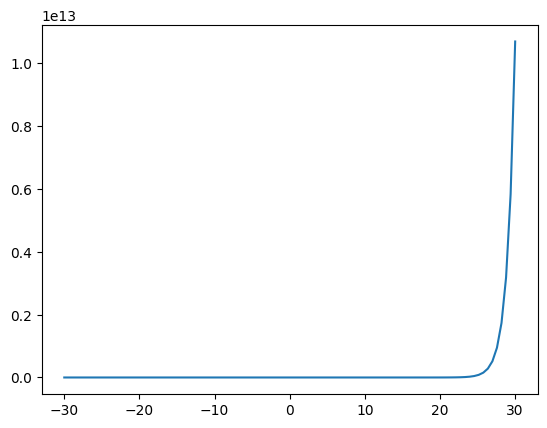

In [ ]:
x = np.linspace(-30,30,100)

fx = np.exp(x)


plt.plot(x,fx)

plt.show()

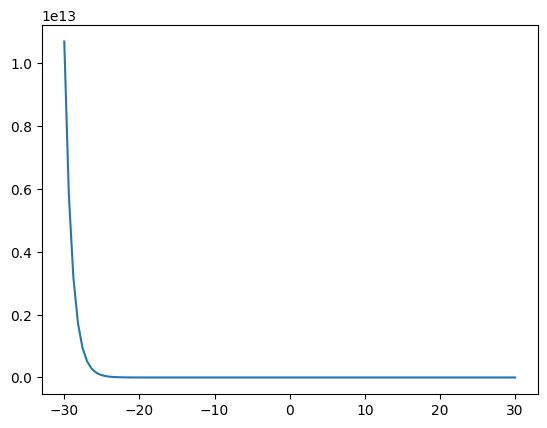

In [ ]:
x = np.linspace(-30,30,100)

fx = np.exp(-x)


plt.plot(x,fx)

plt.show()

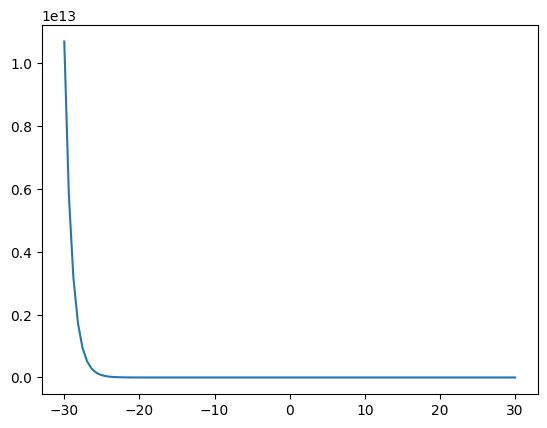

In [ ]:
x = np.linspace(-30,30,100)

fx = 1/np.exp(x)


plt.plot(x,fx)

plt.show()

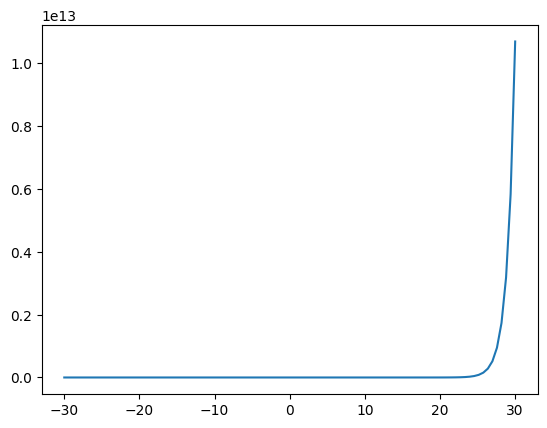

In [ ]:
x = np.linspace(-30,30,100)

fx = 1/np.exp(-x)


plt.plot(x,fx)

plt.show()

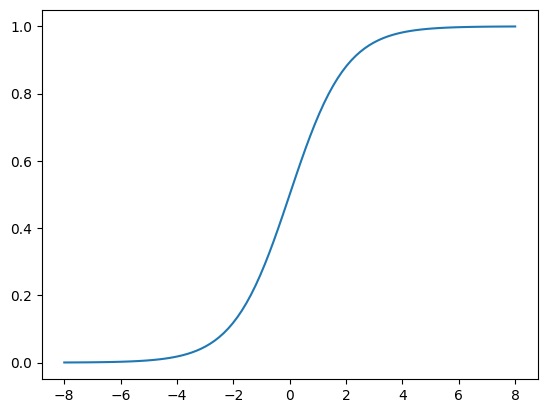

In [ ]:
# sigmoid activation

x = np.linspace(-8,8,100)

fx = 1/(1+np.exp(-x))


plt.plot(x,fx)

plt.show()

# conclusion

# it causes vanishing gradient that is after a point  the values are going to be either zero or one and it will remain
# so no matter how big of an x you add in the function. that's why in SGD after a point the gradient will have vanished
# the algorithm every so often reload its marker with the sigmoid ink to trace along the valley to
# find the global/local mimima
# tanh gradient is stronger than sigmoid. it effectively handles the vanishing gradient factor, tanh doesn't let
# the gradient to vanish as quickly as would have been the case with sigmoid